## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
X = df_pen.drop(['body_mass_g'], axis = 1)
y = df_pen['body_mass_g']

## Data Pre-processing

In [4]:
categorical_x = ['species', 'island', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [5]:
## If y is categorical:
# y.fillna(y.mode(), inplace= True)
##If y is numerical
y.fillna(y.mean(), inplace= True)
for i in numerical_x:
    X[i].fillna(X[i].mean(), inplace = True)

for i in categorical_x:
    X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

In [7]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [8]:
modelo = LinearRegression()

In [9]:
modelo.fit(X_train, y_train)

LinearRegression()

In [10]:
predicciones = modelo.predict(X_test)

## Results

In [11]:
coeficients = pd.DataFrame(modelo.coef_, X.columns, columns = ['Coeficientes'])
coeficients['Magnitude'] = abs(coeficients['Coeficientes'])
coeficients.sort_values('Magnitude', ascending = False).head(5)

,Coeficientes,Magnitude
species_Gentoo,422.436962,422.436962
flipper_length_mm,258.512330,258.512330
sex_Male,153.039618,153.039618
bill_depth_mm,139.478700,139.478700
bill_length_mm,136.892777,136.892777


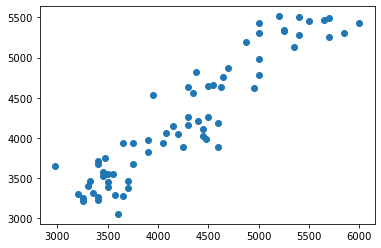

In [12]:
plt.scatter(y_test, predicciones)

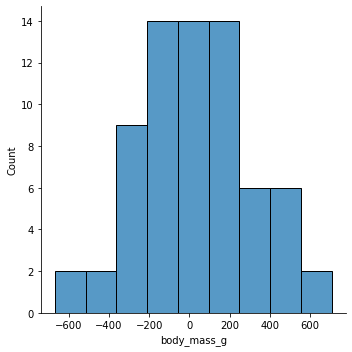

In [13]:
sns.displot(y_test- predicciones)

## Metrics

In [14]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predicciones)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predicciones)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predicciones))}')

Mean Absolute Error: 223.57129575984763
Mean Squared Error: 80171.50575505779
Root Mean Squared Error: 283.14573236243166


## Regularization

### Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

In [16]:
alpha = []
test_rmse_alpha = []
train_rmse_alpha = []

for a in np.linspace(0,10,101):
    ridge_r = Ridge(alpha=a, random_state=43)
    ridge_r.fit(X_train,y_train)
    
    y_pred_test = ridge_r.predict(X_test)
    y_pred_train = ridge_r.predict(X_train)
    
    ridge_rmse_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
    ridge_rmse_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
    
    alpha.append(a)
    test_rmse_alpha.append(ridge_rmse_test)
    train_rmse_alpha.append(ridge_rmse_train)

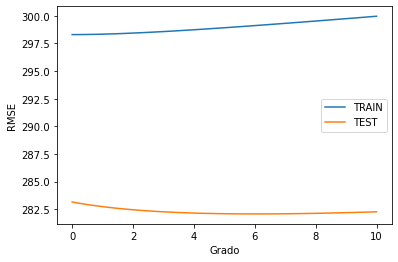

In [17]:
plt.plot(alpha, train_rmse_alpha, label='TRAIN')
plt.plot(alpha, test_rmse_alpha, label='TEST')
plt.xlabel("Grado")
plt.ylabel("RMSE")
plt.legend()

In [18]:
ridge_r = Ridge(alpha= 4, random_state=43)

In [19]:
ridge_r.fit(X_train,y_train)

Ridge(alpha=4, random_state=43)

In [20]:
y_pred = ridge_r.predict(X_test)

In [21]:
coeficients = pd.DataFrame(ridge_r.coef_, X.columns, columns = ['Coeficientes'])
coeficients['Magnitude'] = abs(coeficients['Coeficientes'])
coeficients.sort_values('Magnitude', ascending = False).head(5)

,Coeficientes,Magnitude
species_Gentoo,364.629069,364.629069
flipper_length_mm,271.839506,271.839506
sex_Male,157.160870,157.160870
bill_length_mm,146.538241,146.538241
species_Chinstrap,-134.917951,134.917951


In [22]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Mean Absolute Error: 221.2627341482798
Mean Squared Error: 79606.44007794428
Root Mean Squared Error: 282.1461324880146


### LASSO Regression

In [23]:
from sklearn.linear_model import Lasso

In [24]:
alpha = []
test_rmse_alpha = []
train_rmse_alpha = []

for a in np.linspace(0.1,10,101):
    lasso_r = Lasso(alpha=a, random_state=43)
    lasso_r.fit(X_train,y_train)
    
    y_pred_test = lasso_r.predict(X_test)
    y_pred_train = lasso_r.predict(X_train)
    
    lasso_rmse_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
    lasso_rmse_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
    
    alpha.append(a)
    test_rmse_alpha.append(lasso_rmse_test)
    train_rmse_alpha.append(lasso_rmse_train)

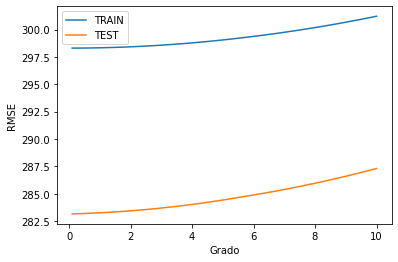

In [25]:
plt.plot(alpha, train_rmse_alpha, label='TRAIN')
plt.plot(alpha, test_rmse_alpha, label='TEST')
plt.xlabel("Grado")
plt.ylabel("RMSE")
plt.legend()

In [26]:
lasso_r = Lasso(alpha=0.01, random_state=43)

In [27]:
lasso_r.fit(X_train,y_train)

Lasso(alpha=0.01, random_state=43)

In [28]:
y_pred = lasso_r.predict(X_test)

In [29]:
coeficients = pd.DataFrame(lasso_r.coef_, X.columns, columns = ['Coeficientes'])
coeficients['Magnitude'] = abs(coeficients['Coeficientes'])
coeficients.sort_values('Magnitude', ascending = False).head(5)

,Coeficientes,Magnitude
species_Gentoo,422.382570,422.382570
flipper_length_mm,258.531120,258.531120
sex_Male,153.061452,153.061452
bill_depth_mm,139.401294,139.401294
bill_length_mm,136.868161,136.868161


In [30]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Mean Absolute Error: 223.57323459005792
Mean Squared Error: 80172.08279964002
Root Mean Squared Error: 283.1467513492606


### Elastic Net

In [31]:
from sklearn.linear_model import ElasticNet

In [32]:
alpha = []
test_rmse_alpha = []
train_rmse_alpha = []

for a in np.linspace(0.1,10,101):
    elastic_r = ElasticNet(alpha=a, random_state=43)
    elastic_r.fit(X_train,y_train)
    
    y_pred_test = elastic_r.predict(X_test)
    y_pred_train = elastic_r.predict(X_train)
    
    elastic_rmse_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
    elastic_rmse_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
    
    alpha.append(a)
    test_rmse_alpha.append(elastic_rmse_test)
    train_rmse_alpha.append(elastic_rmse_train)

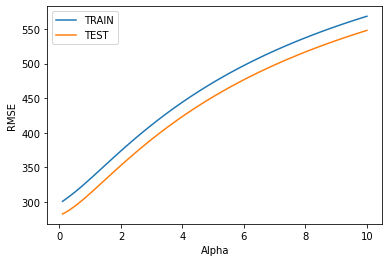

In [33]:
plt.plot(alpha, train_rmse_alpha, label='TRAIN')
plt.plot(alpha, test_rmse_alpha, label='TEST')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.legend()

In [34]:
elastic_r = ElasticNet(alpha=0.01, random_state=43)

In [35]:
elastic_r.fit(X_train,y_train)

ElasticNet(alpha=0.01, random_state=43)

In [36]:
y_pred = elastic_r.predict(X_test)

In [37]:
coeficients = pd.DataFrame(elastic_r.coef_, X.columns, columns = ['Coeficientes'])
coeficients['Magnitude'] = abs(coeficients['Coeficientes'])
coeficients.sort_values('Magnitude', ascending = False).head(5)

,Coeficientes,Magnitude
species_Gentoo,398.599264,398.599264
flipper_length_mm,264.503183,264.503183
sex_Male,154.587393,154.587393
bill_length_mm,141.060478,141.060478
species_Chinstrap,-132.560623,132.560623


In [38]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Mean Absolute Error: 222.3375063123067
Mean Squared Error: 79867.79068925059
Root Mean Squared Error: 282.60890058391755
